### Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Lambda
import matplotlib.pyplot as plt
import numpy as np
import os

# GPU Setting (optional tapi boleh sesuai latihan)
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

### Data Load

In [2]:
TRAIN_DIR = "C:/Users/ASUS/Downloads/dataset_split/dataset_split/train"
VALIDATION_DIR = "C:/Users/ASUS/Downloads/dataset_split/dataset_split/validation"
TEST_DIR = "C:/Users/ASUS/Downloads/dataset_split/dataset_split/test"

IMG_SIZE = (224, 224)
NUM_CLASSES = 4   
BATCH_SIZE = 16
EPOCHS = 30

### Data Preprocessing

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print("Label Mapping:", train_data.class_indices)

Found 240 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 28 images belonging to 4 classes.
Label Mapping: {'nasi_liwet': 0, 'panada': 1, 'rawon': 2, 'rendang': 3}


### Arsitektur AlexNet

In [4]:
model = Sequential([
    # Blok Konvolusi 1
    # Input: 224x224x3
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),

    # Blok Konvolusi 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Blok Konvolusi 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Ratakan (Flatten) output untuk masuk ke bagian klasifikasi
    Flatten(),

    # Lapisan Klasifikasi (Fully Connected Layer)
    Dense(512, activation='relu'),
    Dropout(0.5), # Dropout sangat penting untuk mencegah overfitting pada data kecil

    # Lapisan Output
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,398,148 (169.37 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

### Training & Validation Model

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 760ms/step - accuracy: 0.2187 - loss: 4.1604

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


15/15 ━━━━━━━━━━━━━━━━━━━━ 15s 821ms/step - accuracy: 0.2232 - loss: 4.0667 - val_accuracy: 0.2500 - val_loss: 1.3316
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 743ms/step - accuracy: 0.3732 - loss: 1.2648 - val_accuracy: 0.4375 - val_loss: 1.2071
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 757ms/step - accuracy: 0.5567 - loss: 1.0665 - val_accuracy: 0.6250 - val_loss: 0.9463
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 766ms/step - accuracy: 0.5919 - loss: 0.9220 - val_accuracy: 0.5312 - val_loss: 0.9962
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 761ms/step - accuracy: 0.7646 - loss: 0.7707 - val_accuracy: 0.5938 - val_loss: 0.9651
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 767ms/step - accuracy: 0.7363 - loss: 0.6973 - val_accuracy: 0.7188 - val_loss: 0.6470
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 777ms/step - accuracy: 0.7777 - loss: 0.6286 - val_accuracy: 0.6875 - val_loss: 0.9435
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 771ms/step - accuracy: 0.7096 - loss: 0.6980 - val_accuracy: 0.718

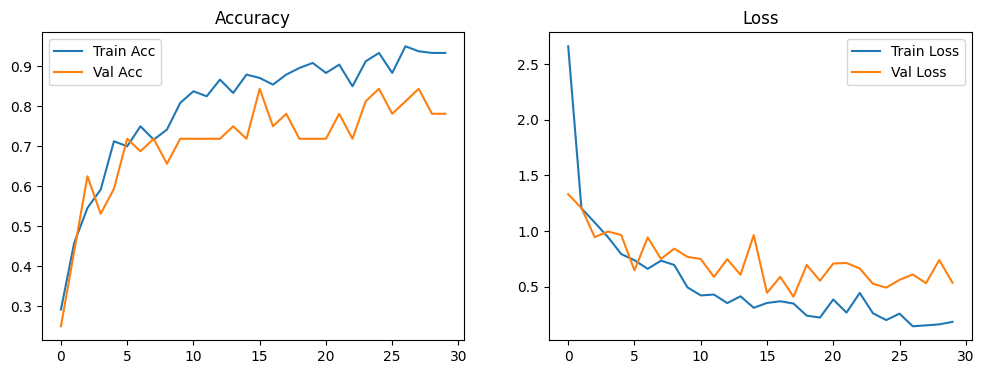

In [5]:
history = model.fit(
    train_data,
    epochs=EPOCHS,
    validation_data=val_data
)

# Plot Accuracy & Loss
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

### Evaluasi Model & Confusion Matrix

c:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.7738 - loss: 1.0587
Test Accuracy: 0.7857142686843872
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step


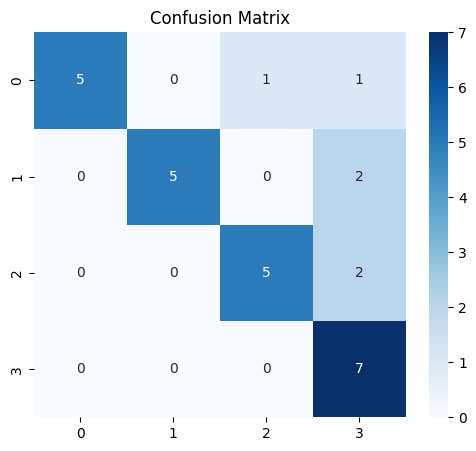

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      0.71      0.83         7
           2       0.83      0.71      0.77         7
           3       0.58      1.00      0.74         7

    accuracy                           0.79        28
   macro avg       0.85      0.79      0.79        28
weighted avg       0.85      0.79      0.79        28



In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

test_loss, test_acc = model.evaluate(test_data)
print("Test Accuracy:", test_acc)

y_pred = np.argmax(model.predict(test_data), axis=1)
y_true = test_data.classes

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred))

### Visualisasi Akurasi & Loss

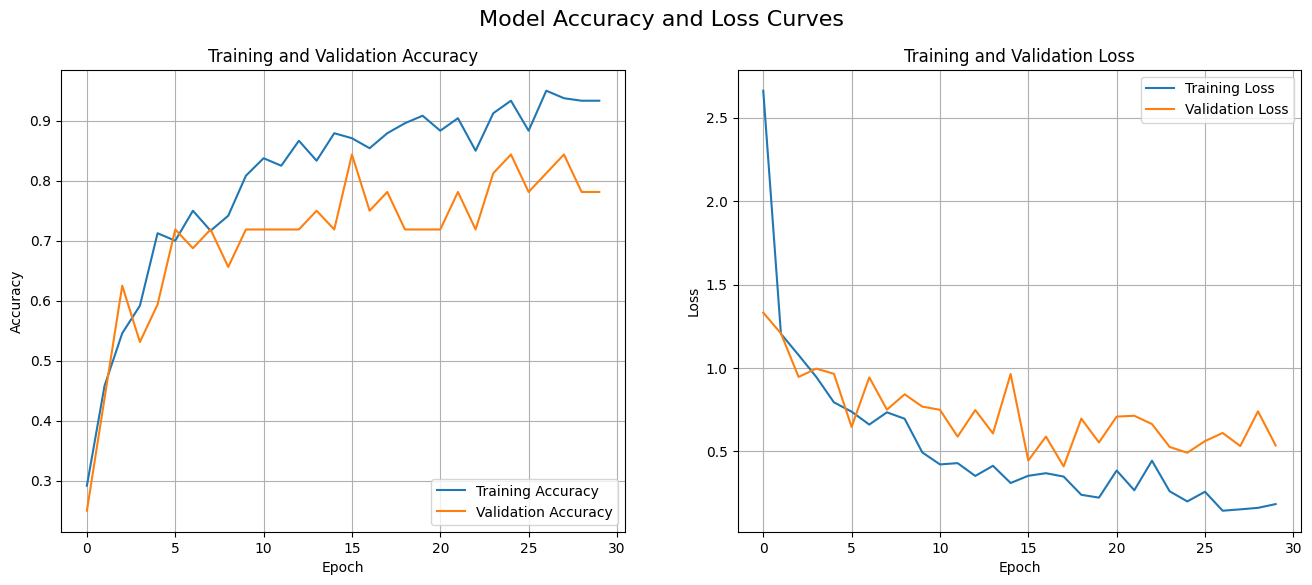

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Membuat plot
plt.figure(figsize=(16, 6))

# Plot untuk Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Plot untuk Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Menampilkan grafik
plt.suptitle('Model Accuracy and Loss Curves', fontsize=16)
plt.show()

### Data Testing

In [8]:
test_loss, test_acc = model.evaluate(test_data)
print(f'Test accuracy: {test_acc*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.7738 - loss: 1.0587
Test accuracy: 78.57%


### Menyimpan Model Terbaik

In [9]:
model.save("UTS_DL_AlexNet.h5")
print("Model telah berhasil disimpan!")

Model telah berhasil disimpan!
